# Sentiment Analysis

## Preparation

In [1]:
import pandas as pd
import numpy as np

## Data loading

In [2]:
df = pd.read_csv("../dataset/sentiment-analysis/Reddit_Data.csv").rename(columns = {"clean_comment":"clean_text"}).append(pd.read_csv("../dataset/sentiment-analysis/Twitter_Data.csv"))
df.head()

,clean_text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


Preprocess

In [3]:
df = df.astype({'clean_text': str})
df.head()

,clean_text,category
0,family mormon have never tried explain them t...,1.0
1,buddhism has very much lot compatible with chr...,1.0
2,seriously don say thing first all they won get...,-1.0
3,what you have learned yours and only yours wha...,0.0
4,for your own benefit you may want read living ...,1.0


Split

In [4]:
df.isnull().any()

clean_text    False
category       True
dtype: bool

In [5]:
df[df['category'].isnull()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [6]:
df.dropna(inplace=True)

Counting word count

In [7]:
import nltk

df['token'] = df['clean_text'].apply(nltk.tokenize.word_tokenize)

In [8]:
df['len'] = df['token'].apply(len)

In [9]:
df.len

0          39
1         196
2          86
3          29
4         112
         ... 
162975     18
162976     36
162977      9
162978     13
162979     34
Name: len, Length: 200222, dtype: int64

In [10]:
df['len'].describe()

count    200222.000000
mean         21.931296
std          26.686952
min           0.000000
25%          10.000000
50%          18.000000
75%          30.000000
max        1307.000000
Name: len, dtype: float64

In [11]:
df[df['len'] > 1000].sort_values('len')

,clean_text,category,token,len
1682,going churlish and ahead and puncture your ba...,1.0,"[going, churlish, and, ahead, and, puncture, y...",1003
6016,the reason very simple copy and paste from red...,1.0,"[the, reason, very, simple, copy, and, paste, ...",1006
29923,india pakistan html for the past few decades ...,1.0,"[india, pakistan, html, for, the, past, few, d...",1009
24431,modi’ government last four years has recovere...,1.0,"[modi, ’, government, last, four, years, has, ...",1035
4184,too much dependence people from iit and iim ca...,1.0,"[too, much, dependence, people, from, iit, and...",1054
10440,demonetisation fails then blame modi told cab...,1.0,"[demonetisation, fails, then, blame, modi, tol...",1084
20979,there redemption for the crimes committed agai...,1.0,"[there, redemption, for, the, crimes, committe...",1103
7231,let one one food beef obviously same thing her...,1.0,"[let, one, one, food, beef, obviously, same, t...",1119
4373,part you have something mind please let know c...,1.0,"[part, you, have, something, mind, please, let...",1177
28490,first all extremely sad people misunderstood y...,1.0,"[first, all, extremely, sad, people, misunders...",1181


In [12]:
df['clean_text'].iloc[8646]

'brilliant point point breakdown one other argument making the rounds false argument okay maybe the strikes took place but should have been kept secret and deniable there good reason for dgmo make statements about covert actions except for bjp score political points there are massive number reasons make strike like this public exposes pakistan bluster just tough talk for all their talk being high alert for indian troop movement along the loc after the uri attack they didn even see coming massively boosts morale within the armed forces morale which has been getting steadily lower our bases kept getting hit while they were not allowed take charge the offensive the troops are also being vilified the media national and international while trying control spiral violence srinagar fueled pakistan propaganda machine makes the best use pakistan blunder overreaching and outmaneuvers them pakistan has its hands tied now after making bold statements about defending against indian adventurism aggre

In [14]:
# df['label'] = df['category'].map({
#     -1.0: np.array([1, 0, 0], dtype=float),
#     0.0: np.array([0, 1, 0], dtype=float),
#     1.0: np.array([0, 0, 1], dtype=float)
# })
# df.drop('label', axis=1)
df['label'] = df['category'].map({
    -1.0: [1, 0, 0],
    0.0: [0, 1, 0],
    1.0: [0, 0, 1]
})

In [15]:
df.head()

,clean_text,category,token,len,label
0,family mormon have never tried explain them t...,1.0,"[family, mormon, have, never, tried, explain, ...",39,"[0, 0, 1]"
1,buddhism has very much lot compatible with chr...,1.0,"[buddhism, has, very, much, lot, compatible, w...",196,"[0, 0, 1]"
2,seriously don say thing first all they won get...,-1.0,"[seriously, don, say, thing, first, all, they,...",86,"[1, 0, 0]"
3,what you have learned yours and only yours wha...,0.0,"[what, you, have, learned, yours, and, only, y...",29,"[0, 1, 0]"
4,for your own benefit you may want read living ...,1.0,"[for, your, own, benefit, you, may, want, read...",112,"[0, 0, 1]"


In [16]:
sample = df.sample(frac=1.0, random_state=4)
train = sample[:int(0.8*len(sample))]
test = sample[int(0.8*len(sample)):]

In [17]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train['clean_text'].values)


In [18]:
print(len(tokenizer.word_index))
len(tokenizer.word_index)**0.25


121047


18.65256266064929

In [19]:
# a = "I remember it all too well"
# tokenizer.texts_to_sequences([a])

In [20]:
sequence_train = tokenizer.texts_to_sequences(train["clean_text"])
sequence_test = tokenizer.texts_to_sequences(test["clean_text"])

In [45]:
pad_train= tf.keras.preprocessing.sequence.pad_sequences(sequence_train, maxlen=50, padding='pre')
pad_test= tf.keras.preprocessing.sequence.pad_sequences(sequence_test, maxlen=50, padding='pre')


RNN

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#hidden and output layer
model = keras.Sequential(
    [
     tf.keras.layers.Embedding(len(tokenizer.word_index)+1,64,input_length=50, trainable=True), #total vocab, output (dari total vocab akar 4)
     layers.LSTM(64, name="hai_shaq"), #hidden layer
     # layers.LSTM(64, return_sequences=True), #hidden layer
     # layers.LSTM(64, return_sequences=True), #hidden layer
     # layers.LSTM(64, return_sequences=True), #hidden layer
     # layers.LSTM(64), #hidden layer
     # layers.Dense(64, activation=tf.nn.relu),
     layers.Dense(64, activation=tf.nn.relu),
     # layers.Dense(3, activation ="softmax", name="layer3") #output layer
     layers.Dense(3, activation ="softmax", name="layer3") #output layer
    ]
)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 64)            7747072   
                                                                 
 hai_shaq (LSTM)             (None, 64)                33024     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 layer3 (Dense)              (None, 3)                 195       
                                                                 
Total params: 7,784,451
Trainable params: 7,784,451
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy" , metrics=['accuracy'])
# model.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy" , metrics=['accuracy'])

Fit the model

In [94]:
print(tf.convert_to_tensor([1, 0, 0]))
print(train['label'].iloc[0])
print(tf.convert_to_tensor(train['label'].values))

tf.Tensor([1 0 0], shape=(3,), dtype=int32)
[1, 0, 0]


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [95]:
train['category']

20126    -1.0
160018    1.0
13740     0.0
118913    0.0
16820     1.0
         ... 
20433     0.0
64887     0.0
59823     1.0
17789    -1.0
92015     1.0
Name: category, Length: 160177, dtype: float64

In [96]:
pd.get_dummies(train['category'])

,-1.0,0.0,1.0
20126,1,0,0
160018,0,0,1
13740,0,1,0
118913,0,1,0
16820,0,0,1
...,...,...,...
20433,0,1,0
64887,0,1,0
59823,0,0,1
17789,1,0,0


In [97]:
history = model.fit(x=pad_train, y=pd.get_dummies(train['category']), batch_size=32, epochs=100, verbose=1,
    validation_data=[pad_test,pd.get_dummies(test['category'])],
          steps_per_epoch=32)

Epoch 1/100
32/32 [==============================] - 9s 237ms/step - loss: 1.0461 - accuracy: 0.4346 - val_loss: 1.0028 - val_accuracy: 0.5289
Epoch 2/100
32/32 [==============================] - 7s 218ms/step - loss: 0.9726 - accuracy: 0.5391 - val_loss: 0.9637 - val_accuracy: 0.5471
Epoch 3/100
32/32 [==============================] - 7s 218ms/step - loss: 0.9612 - accuracy: 0.5449 - val_loss: 0.9343 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 7s 220ms/step - loss: 0.9402 - accuracy: 0.5557 - val_loss: 0.8829 - val_accuracy: 0.5969
Epoch 5/100
32/32 [==============================] - 7s 217ms/step - loss: 0.8611 - accuracy: 0.6201 - val_loss: 0.8312 - val_accuracy: 0.6217
Epoch 6/100
32/32 [==============================] - 7s 222ms/step - loss: 0.8059 - accuracy: 0.6309 - val_loss: 0.7561 - val_accuracy: 0.6592
Epoch 7/100
32/32 [==============================] - 7s 222ms/step - loss: 0.7508 - accuracy: 0.6582 - val_loss: 0.7354 - val_accuracy: 0.6909

In [98]:
model.save('../model/sentiment-model')

INFO:tensorflow:Assets written to: ../model/sentiment-model\assets


INFO:tensorflow:Assets written to: ../model/sentiment-model\assets


In [99]:
prediction = model.predict(pad_test)

In [102]:
type(prediction.round())

numpy.ndarray

In [103]:
type(pd.get_dummies(test['category']))

pandas.core.frame.DataFrame

In [104]:
from sklearn.metrics import accuracy_score

accuracy_score(pd.get_dummies(test['category']), prediction.round())

0.9399925084280185

In [106]:
history.history['accuracy']

TypeError: 'dict' object is not callable

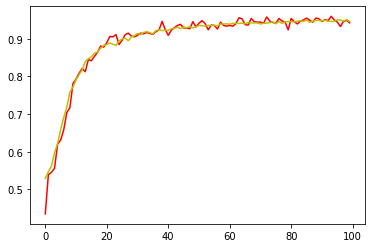

In [109]:
from matplotlib import pyplot as plt

plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], 'r')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], 'y')
plt.show()